# CIFAR-10 分类

来源：https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

 = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 170498071/170498071 [01:37<00:00, 1753482.50it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


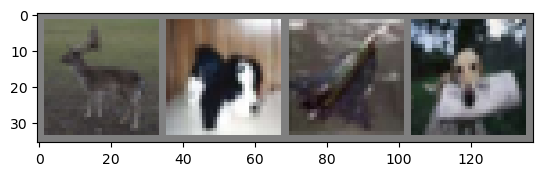

deer  dog   plane dog  


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [68]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [69]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.037
[1,  4000] loss: 1.034
[1,  6000] loss: 1.040
[1,  8000] loss: 1.049
[1, 10000] loss: 1.026
[1, 12000] loss: 1.019
[2,  2000] loss: 0.944
[2,  4000] loss: 0.961
[2,  6000] loss: 0.978
[2,  8000] loss: 0.984
[2, 10000] loss: 0.978
[2, 12000] loss: 0.968
[3,  2000] loss: 0.885
[3,  4000] loss: 0.894
[3,  6000] loss: 0.932
[3,  8000] loss: 0.942
[3, 10000] loss: 0.953
[3, 12000] loss: 0.958
[4,  2000] loss: 0.853
[4,  4000] loss: 0.888
[4,  6000] loss: 0.889
[4,  8000] loss: 0.882
[4, 10000] loss: 0.914
[4, 12000] loss: 0.889
[5,  2000] loss: 0.799
[5,  4000] loss: 0.840
[5,  6000] loss: 0.851
[5,  8000] loss: 0.879
[5, 10000] loss: 0.873
[5, 12000] loss: 0.892
Finished Training


In [70]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


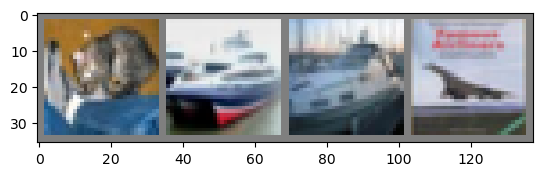

GroundTruth:  cat   ship  ship  plane


In [71]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [72]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

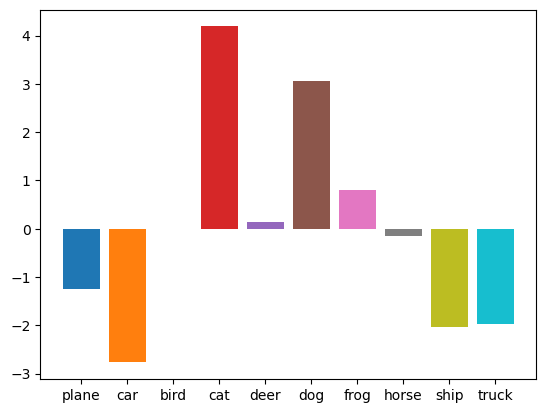

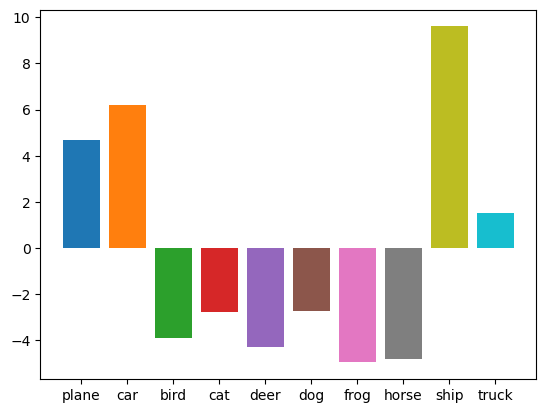

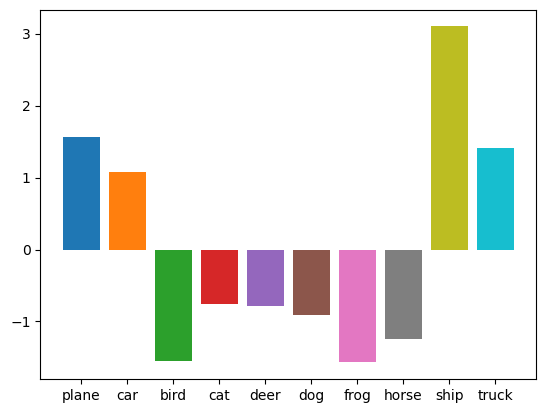

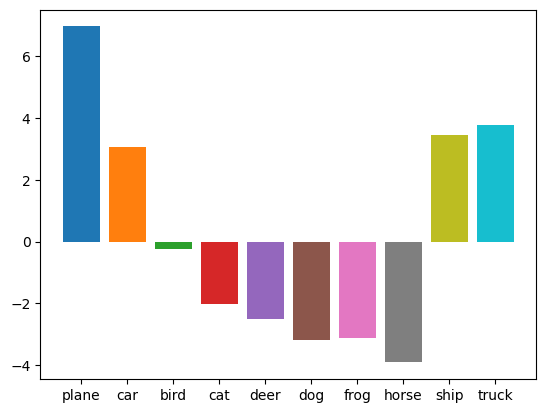

In [73]:
outputs = net(images)
#print(outputs)
#for i in range(outputs):

for j in range(4):
    for i in range(10):
        plt.bar(classes[i],outputs[j][i].item())
    plt.show()
    

In [74]:
#len(outputs[0])
classes
#for i in range()

('plane',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

In [75]:
_, predicted = torch.max(outputs, 1)

print(predicted)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

tensor([3, 8, 8, 0])
Predicted:  cat   ship  ship  plane


In [76]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 61 %


In [77]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 64.4 %
Accuracy for class: car   is 69.1 %
Accuracy for class: bird  is 40.0 %
Accuracy for class: cat   is 49.7 %
Accuracy for class: deer  is 58.3 %
Accuracy for class: dog   is 51.9 %
Accuracy for class: frog  is 68.5 %
Accuracy for class: horse is 63.4 %
Accuracy for class: ship  is 69.9 %
Accuracy for class: truck is 75.3 %
